<a href="https://colab.research.google.com/github/brianfarrelly/final_capstone/blob/master/viral_pneumonia_xrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd

from google.colab import drive


import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [42]:
print(tf.__version__)

2.2.0


In [43]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
DATASET_DIR = "/content/gdrive/My Drive/data/coronadata/normal_viral/"

In [45]:
os.listdir(DATASET_DIR)


['train', 'test', 'viralmodel.h5', 'tfviralmodel.h5']

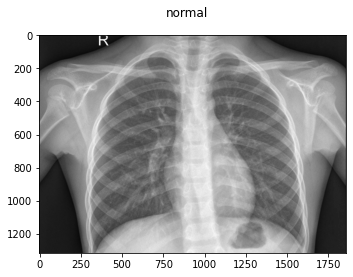

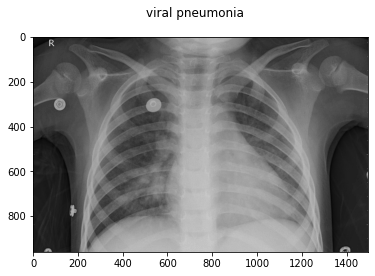

In [46]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/test/normal/*'):
    normal_images.append(mpimg.imread(img_path))
    break

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/test/viral/*'):
    covid_images.append(mpimg.imread(img_path))
    break

fig = plt.figure()
fig.suptitle('viral pneumonia')
plt.imshow(covid_images[0], cmap='gray') 

In [0]:
IMG_W = 400
IMG_H = 400
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))

model.add(Dense(2))

#model.add(Dense(1))
#model.add(Activation("sigmoid"))

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 398, 398, 32)      896       
_________________________________________________________________
activation_28 (Activation)   (None, 398, 398, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 197, 197, 32)      9248      
_________________________________________________________________
activation_29 (Activation)   (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 96, 96, 64)       

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'mae', 'sparse_categorical_accuracy'])


In [0]:
DATASET_DIR = "/content/gdrive/My Drive/data/coronadata/normal_viral/"

In [51]:
print(DATASET_DIR)

/content/gdrive/My Drive/data/coronadata/normal_viral/


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,                                   
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    #fill_mode='nearest'
    )

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)



In [53]:
train_generator = train_datagen.flow_from_directory(
    directory=DATASET_DIR + "/train/",
    target_size=(IMG_W, IMG_H),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=DATASET_DIR + "/test/",
    target_size=(IMG_W, IMG_H),
    color_mode="rgb",
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=42
)


Found 2600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.





---



---


---



---

Tensorboard

---



---




---


---



In [78]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
%reload_ext tensorboard

In [1]:
!kill 5569


/bin/bash: line 0: kill: (5569) - No such process


In [0]:
%tensorboard --logdir logs

In [0]:
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)




---



---



---



---



---



---



In [54]:
history = model.fit(
    train_generator,
    steps_per_epoch = 64,
    epochs = 100)
    #callbacks=[tensorboard_callback])


Epoch 1/100
64/64 [==============================] - 91s 1s/step - loss: 0.6925 - accuracy: 0.5293 - mae: 0.5932 - sparse_categorical_accuracy: 0.5293
Epoch 2/100
64/64 [==============================] - 91s 1s/step - loss: 0.6728 - accuracy: 0.6191 - mae: 0.6909 - sparse_categorical_accuracy: 0.6191
Epoch 3/100
64/64 [==============================] - 90s 1s/step - loss: 0.5129 - accuracy: 0.7515 - mae: 0.9960 - sparse_categorical_accuracy: 0.7515
Epoch 4/100
64/64 [==============================] - 90s 1s/step - loss: 0.4413 - accuracy: 0.7900 - mae: 1.8443 - sparse_categorical_accuracy: 0.7900
Epoch 5/100
64/64 [==============================] - 92s 1s/step - loss: 0.2962 - accuracy: 0.8940 - mae: 1.9250 - sparse_categorical_accuracy: 0.8940
Epoch 6/100
64/64 [==============================] - 91s 1s/step - loss: 0.2571 - accuracy: 0.9046 - mae: 2.1739 - sparse_categorical_accuracy: 0.9046
Epoch 7/100
64/64 [==============================] - 90s 1s/step - loss: 0.2302 - accuracy: 0.

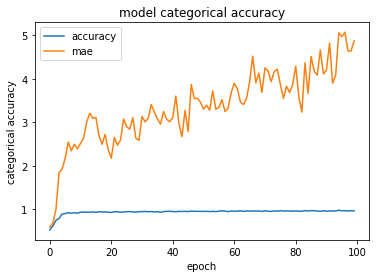

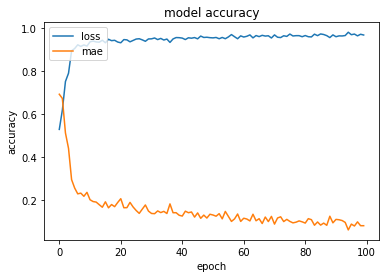

In [55]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['mae'])
plt.title('model categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'mae'], loc='upper left')
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'mae'], loc='upper left')
plt.show()


In [56]:
print("accuracy", history.history['accuracy'][-1])
print("mae", history.history['mae'][-1])
print("loss", history.history['loss'][-1])
print("sparse_categorical_accuracy", history.history['sparse_categorical_accuracy'][-1])


accuracy 0.967391312122345
mae 4.873342514038086
loss 0.08230745047330856
sparse_categorical_accuracy 0.967391312122345


In [0]:
PATH = '/content/gdrive/My Drive/data/corona/Chest_xray_Corona_Metadata.csv'
meta = pd.read_csv(PATH)

In [58]:
test = meta[meta.Dataset_type == 'TEST']
test = test.fillna(0)
test.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5286,5309,IM-0021-0001.jpeg,Normal,TEST,0,0
5287,5310,IM-0019-0001.jpeg,Normal,TEST,0,0
5288,5311,IM-0017-0001.jpeg,Normal,TEST,0,0
5289,5312,IM-0016-0001.jpeg,Normal,TEST,0,0
5290,5313,IM-0015-0001.jpeg,Normal,TEST,0,0


In [59]:
testpnem = test[test.Label =='Pnemonia']
testpnem.shape

(390, 6)

In [60]:
bac_testpnem = testpnem[testpnem.Label_1_Virus_category == 'bacteria']
bac_testpnem.shape

(242, 6)

In [61]:
viral_testpnem = testpnem[testpnem.Label_1_Virus_category == 'Virus']
viral_testpnem.shape

(148, 6)

In [62]:
testnorm = test[test.Label == 'Normal']
testnorm.shape

(234, 6)

In [0]:
testnorm = testnorm.sample(140, replace=True)
viral_testpnem = viral_testpnem.sample(140, replace=True) 

In [0]:
TESTDATA_DIR = "/content/gdrive/My Drive/data/corona/test/"

In [65]:
print(TESTDATA_DIR)

/content/gdrive/My Drive/data/corona/test/


In [0]:
import cv2
from PIL import Image
from cv2 import imshow


In [82]:

X_test = []
Y_test = []

num = 0

for imgname in testnorm['X_ray_image_name']:
  path = TESTDATA_DIR + str(imgname)
 
  img = cv2.imread(path)
   
  rimg = cv2.resize(img, (400, 400))
  
  rimg = rimg / 255.0
  
  X_test.insert(0, rimg)
  Y_test.insert(0, 0)
  
  print(num)
  print(path)
  type(rimg)
  len(rimg)
  num += 1

  if(num>139):
    break

0
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0301-0001.jpeg
1
/content/gdrive/My Drive/data/corona/test/IM-0001-0001.jpeg
2
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0198-0001.jpeg
3
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0112-0001.jpeg
4
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0273-0001.jpeg
5
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0325-0001.jpeg
6
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0117-0001.jpeg
7
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0060-0001.jpeg
8
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0285-0001.jpeg
9
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0028-0001.jpeg
10
/content/gdrive/My Drive/data/corona/test/IM-0077-0001.jpeg
11
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0013-0001.jpeg
12
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0302-0001.jpeg
13
/content/gdrive/My Drive/data/corona/test/NORMAL2-IM-0111-0001.jpeg
14
/content/gdrive/My Drive/data

In [83]:
num = 0

for imgname in viral_testpnem['X_ray_image_name']:
  path = TESTDATA_DIR + str(imgname)
  img = cv2.imread(path)
  
  rimg = cv2.resize(img, (400, 400))
    
  rimg = rimg / 255.0

  X_test.insert(0, rimg)
  Y_test.insert(0, 1)
  
  print(num)
  print(path)
  num += 1

  if(num>139):
    break

0
/content/gdrive/My Drive/data/corona/test/person1642_virus_2842.jpeg
1
/content/gdrive/My Drive/data/corona/test/person1670_virus_2886.jpeg
2
/content/gdrive/My Drive/data/corona/test/person1657_virus_2864.jpeg
3
/content/gdrive/My Drive/data/corona/test/person11_virus_38.jpeg
4
/content/gdrive/My Drive/data/corona/test/person19_virus_50.jpeg
5
/content/gdrive/My Drive/data/corona/test/person1640_virus_2839.jpeg
6
/content/gdrive/My Drive/data/corona/test/person1664_virus_2877.jpeg
7
/content/gdrive/My Drive/data/corona/test/person14_virus_44.jpeg
8
/content/gdrive/My Drive/data/corona/test/person53_virus_108.jpeg
9
/content/gdrive/My Drive/data/corona/test/person62_virus_119.jpeg
10
/content/gdrive/My Drive/data/corona/test/person1626_virus_2818.jpeg
11
/content/gdrive/My Drive/data/corona/test/person1_virus_9.jpeg
12
/content/gdrive/My Drive/data/corona/test/person3_virus_17.jpeg
13
/content/gdrive/My Drive/data/corona/test/person1626_virus_2818.jpeg
14
/content/gdrive/My Drive/dat

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X_test  = np.array(X_test)
y_test  = np.array(Y_test)

In [85]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
results = model.predict(X_test)

In [0]:
print(results)

In [0]:
test = np.argmax(model.predict(X_test), axis=-1)

In [87]:
len(test)

280

In [88]:
print(test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


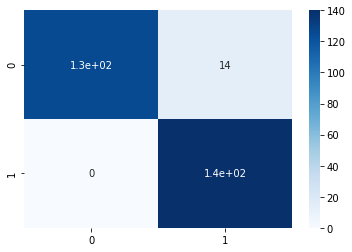

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict_classes(X_test))
sns.heatmap(cm, cmap='Blues', annot=True)

In [90]:
model.evaluate(X_test, y_test, verbose=1)

9/9 [==============================] - 0s 49ms/step - loss: 0.3247 - accuracy: 0.9500 - mae: 4.4391 - sparse_categorical_accuracy: 0.9500


[0.3246895670890808, 0.949999988079071, 4.439093112945557, 0.949999988079071]

In [79]:
# evaluate the model
scores = model.evaluate(test_generator, steps=200, verbose=1)


200/200 [==============================] - 217s 1s/step - loss: 0.7626 - accuracy: 0.8870 - mae: 4.7768 - sparse_categorical_accuracy: 0.8870


In [80]:
print("%s: %f" % (model.metrics_names[0], scores[0]))
print("%s: %f" % (model.metrics_names[1], scores[1]))
print("%s: %f" % (model.metrics_names[2], scores[2]))
print("%s: %f" % (model.metrics_names[3], scores[3]))


loss: 0.762620
accuracy: 0.887013
mae: 4.776789
sparse_categorical_accuracy: 0.887013


In [81]:
# save model and architecture to single file
model.save(DATASET_DIR+ "/tf2viralmodel.h5")
print("Saved model to disk")

Saved model to disk
